In [53]:
#Overview - “Will a customer accept the coupon?” 
#Data
#Source: UCI Machine Learning Repository  collected via a survey on Amazon Mechanical Turk.
#Description: 
#  The survey describes different driving scenarios, including the destination, current time, weather, and passenger, and then asks people whether they will accept the coupon if they are the driver. 
#  There are three possible answers people can choose from:
#   - “Right away” (label "Y = 1")
#   - “Later, before the coupon expires” (label "Y = 1")
#   - “No, I do not want the coupon” (label "Y = 0")
#  There are five different types of coupons: 
#     - Less expensive restaurants (under $20)
#     - Coffee houses
#     - Carryout and takeaway
#     - Bars
#     - More expensive restaurants ($20–$50)

In [54]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
#Coupons - read CSV file
#aqui
#NOTE --- adjust path to the final version !!!!

coupons_df = pd.read_csv('../data/coupons.csv')

In [56]:
#Inspect columns of the dataframe
coupons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [57]:
#List columns of the dataframe
coupons_df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [58]:
#Inspect first lines of the dataset
coupons_df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [59]:
#Describe the data frame
description = coupons_df.describe()
print (description)

        temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12684.000000  12684.000000           12684.0       12684.000000   
mean      63.301798      0.414144               1.0           0.561495   
std       19.154486      0.492593               0.0           0.496224   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12684.000000    12684.000000   12684.000000  12684.000000  
mean            0.119126        0.214759       0.785241      0.568433  
std             0.323950        0.410671       0.410671      0.495314  
min             0.000000        0.000000     

In [60]:
#Check for missing or potentially problematic values
print(coupons_df.isna().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [61]:
#Data Cleasing and Data Preparation

In [62]:
#Column "cars" have many missings values, therefore I dropped the column as it has limited use for this analysis.
del coupons_df['car']

In [63]:
#Check for missing or potentially problematic values after the drop
print(coupons_df.isna().sum())

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64


In [64]:
#Checking for missing values (NaN)
missing_counts = coupons_df.isnull().sum().sort_values()
print(missing_counts)

destination               0
direction_same            0
toCoupon_GEQ25min         0
toCoupon_GEQ15min         0
toCoupon_GEQ5min          0
income                    0
direction_opp             0
education                 0
has_children              0
occupation                0
age                       0
gender                    0
expiration                0
coupon                    0
time                      0
temperature               0
weather                   0
passanger                 0
maritalStatus             0
Y                         0
Bar                     107
RestaurantLessThan20    130
CarryAway               151
Restaurant20To50        189
CoffeeHouse             217
dtype: int64


In [65]:
#Drop missing values (NaN)
coupons_df = coupons_df.dropna()

In [66]:
#Checking for missing values after dropping NaN
missing_counts = coupons_df.isnull().sum().sort_values()
print(missing_counts)

destination             0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
income                  0
direction_opp           0
occupation              0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
passanger               0
education               0
Y                       0
dtype: int64


In [67]:
## Checking number of rows for each column after dropping NaN
coupons_df.count()

destination             12079
passanger               12079
weather                 12079
temperature             12079
time                    12079
coupon                  12079
expiration              12079
gender                  12079
age                     12079
maritalStatus           12079
has_children            12079
education               12079
occupation              12079
income                  12079
Bar                     12079
CoffeeHouse             12079
CarryAway               12079
RestaurantLessThan20    12079
Restaurant20To50        12079
toCoupon_GEQ5min        12079
toCoupon_GEQ15min       12079
toCoupon_GEQ25min       12079
direction_same          12079
direction_opp           12079
Y                       12079
dtype: int64

In [68]:
#Ignore any warnings
import warnings
warnings.filterwarnings('ignore')

In [69]:
#Check for row duplicates by comparing the shapes of the DataFrame before and after removing duplicates.
print("Number of Rows BEFORE removing duplicates:", coupons_df.shape)

Number of Rows BEFORE removing duplicates: (12079, 25)


In [70]:
#Remove duplicates. Recheck remaining rows count
coupons_df = coupons_df.drop_duplicates()
print("Number of Rows AFTER removing duplicates:", coupons_df.shape)

Number of Rows AFTER removing duplicates: (12007, 25)


In [71]:
#Check for non-numeric values
print(coupons_df.select_dtypes(exclude=['number']).columns, '\n')

#Check for numeric values
print(coupons_df.select_dtypes(include=['number']).columns)

Index(['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
       'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
       'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object') 

Index(['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'],
      dtype='object')


In [72]:
#Convert column 'has_children' from float to integer to count kids (0 or 1)
# Inspect unique values of 'has_children'
print(coupons_df['has_children'].unique())
coupons_df['has_children'] = coupons_df['has_children'].astype(int)

[0 1]


In [73]:
#Rename column 'passanger' to "passenger'
coupons_df = coupons_df.rename(columns={'passanger': 'passenger'})
# Verify the change
print(coupons_df.columns)

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')


In [74]:
#Understand correlations and inspect contingency tables

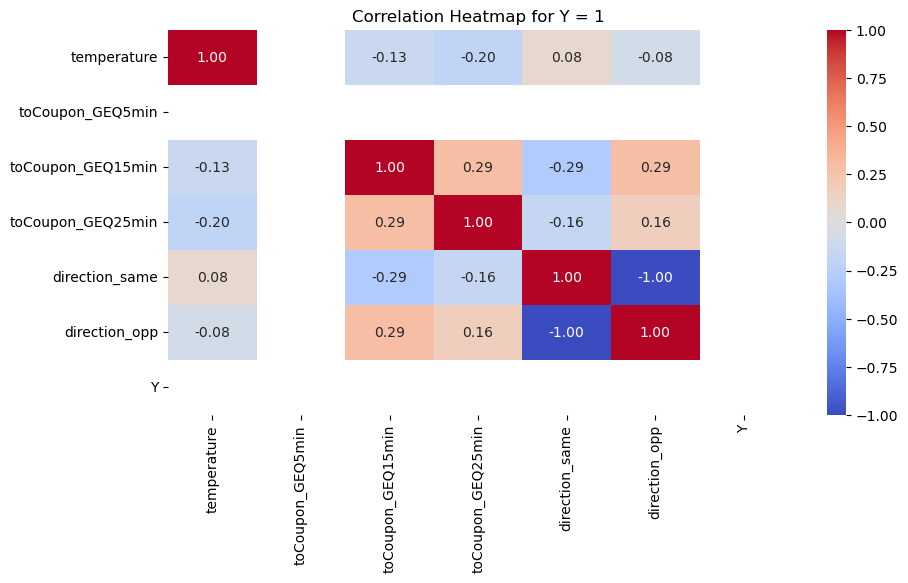

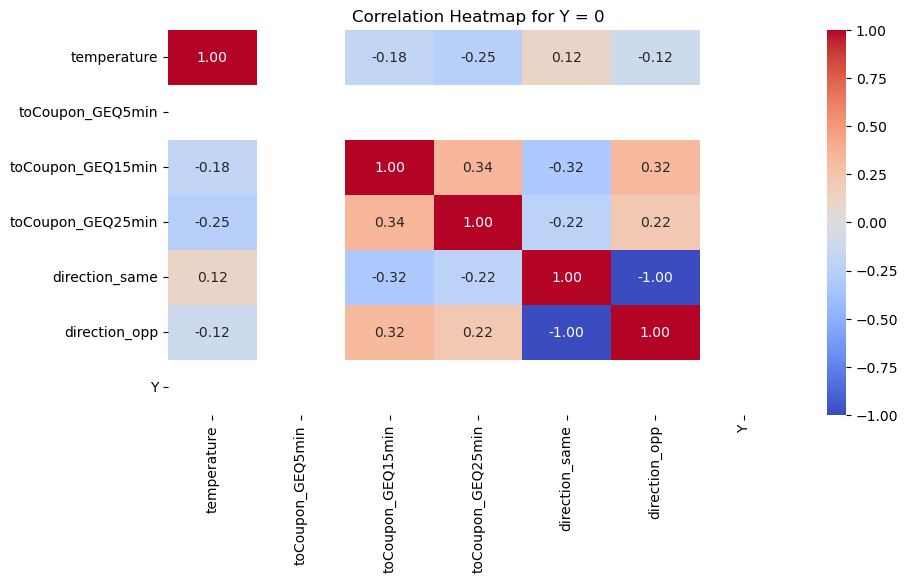

In [75]:
#Understand the correlations among numerical features for each response "Y"
#Compute the numerical features correlated with class type Y = `1` and `0` separately.

#Get unique Y response types: "0" and "1"
classtypes = coupons_df['Y'].unique()

# Loop through each class to plot a heatmap of correlation matrix
for Y in classtypes:
    #Filter the DataFrame for the current class
    subset_coupons_df = coupons_df[coupons_df['Y'] == Y]  # Select the response to coupons ('Y') and create a subset dataframe
    numerical_subset_coupons_df = subset_coupons_df.select_dtypes(include=['int64', 'float64'])  # Select only numerical variables
    corr = numerical_subset_coupons_df.corr()   #generate a correlation matrix for each class
    
    #Plot correlations
    plt.figure(figsize=(10, 5))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for Y = {Y}')
    plt.show()

In [76]:
#Understand Covariance
coupons_cov = ''

#Select only numerical variables
coupons_numeric = coupons_df.select_dtypes(include=['int64', 'float64'])  

#Generate a covariance matrix for each class of coupons
coupons_cov = coupons_numeric.cov()

coupons_cov

,temperature,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,366.019674,0.0,-1.496656,-1.390035,0.774567,-0.774567,0.517899
toCoupon_GEQ5min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
toCoupon_GEQ15min,-1.496656,0.0,0.246479,0.051218,-0.062202,0.062202,-0.020376
toCoupon_GEQ25min,-1.390035,0.0,0.051218,0.102756,-0.025110,0.025110,-0.016701
direction_same,0.774567,0.0,-0.062202,-0.025110,0.169334,-0.169334,0.003006
direction_opp,-0.774567,0.0,0.062202,0.025110,-0.169334,0.169334,-0.003006
Y,0.517899,0.0,-0.020376,-0.016701,0.003006,-0.003006,0.245339


In [77]:
#Understand the contingency tables
categorical_columns = coupons_df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

for col in categorical_columns:
    if col != 'Y':  # Assuming 'Y' is also a categorical column
        contingency_table = pd.crosstab(index=coupons_df[col], columns=coupons_df['Y'])   #create a contingent table for each column x the credit_call result
        print(f"Contingency Table for column = {col}:\n", contingency_table, "\n", "-----------------------------------------------------------", "\n")

Contingency Table for column = destination:
 Y                   0     1
destination                
Home             1514  1564
No Urgent Place  2181  3772
Work             1487  1489 
 ----------------------------------------------------------- 

Contingency Table for column = passenger:
 Y             0     1
passenger            
Alone      3280  3634
Friend(s)  1018  2124
Kid(s)      470   463
Partner     414   604 
 ----------------------------------------------------------- 

Contingency Table for column = weather:
 Y           0     1
weather            
Rainy     612   527
Snowy     691   632
Sunny    3879  5666 
 ----------------------------------------------------------- 

Contingency Table for column = time:
 Y        0     1
time            
10AM   846  1308
10PM   919   977
2PM    649  1264
6PM   1281  1787
7AM   1487  1489 
 ----------------------------------------------------------- 

Contingency Table for column = coupon:
 Y                         0     1
coupon      

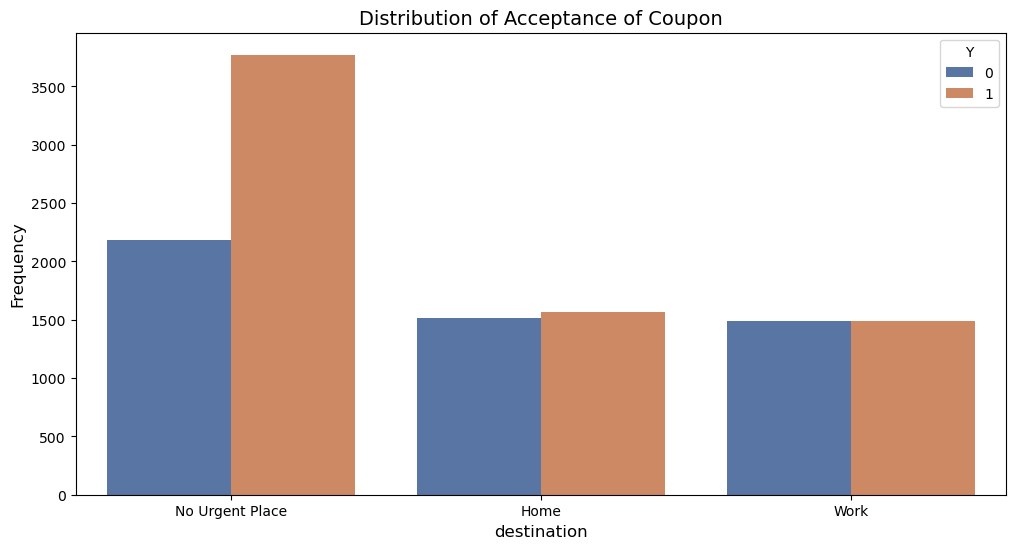

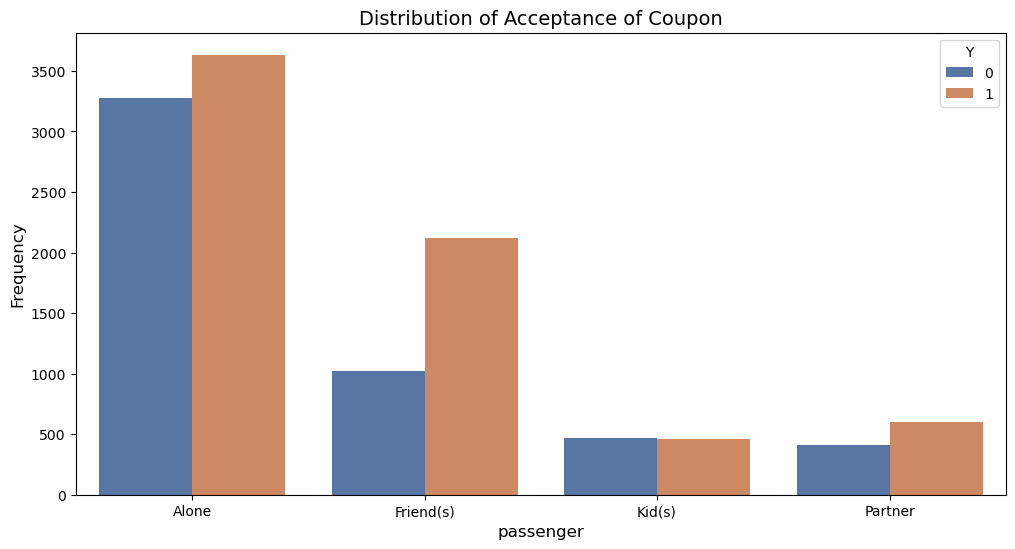

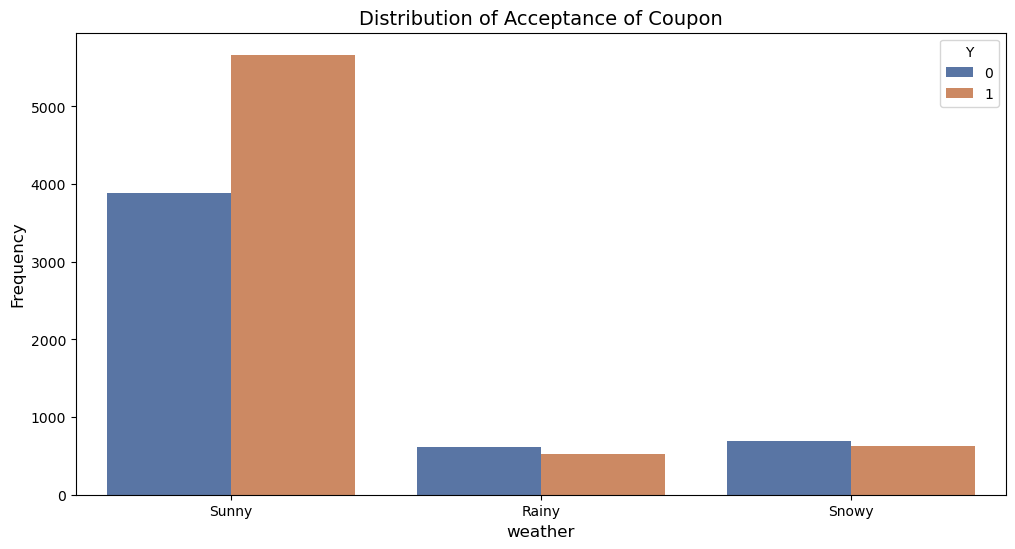

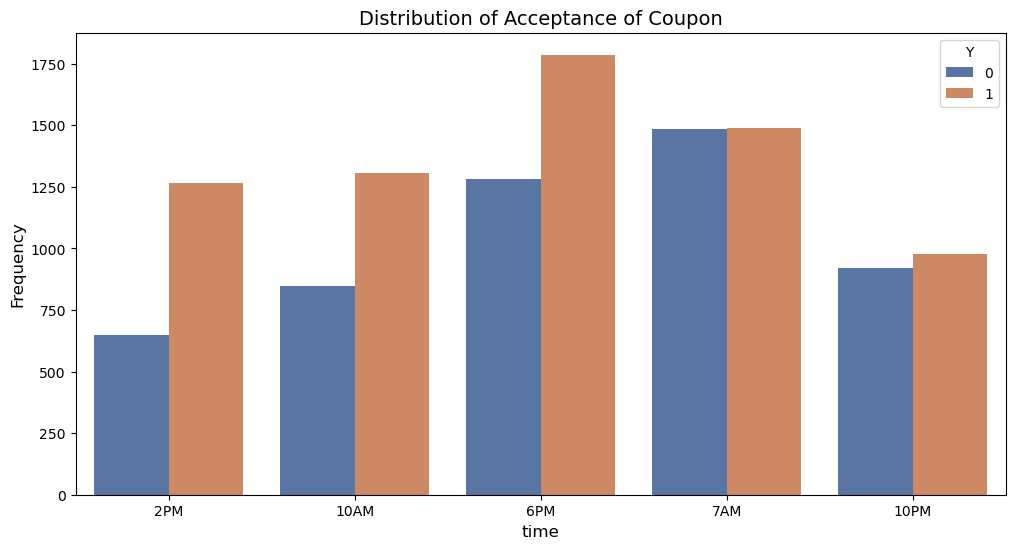

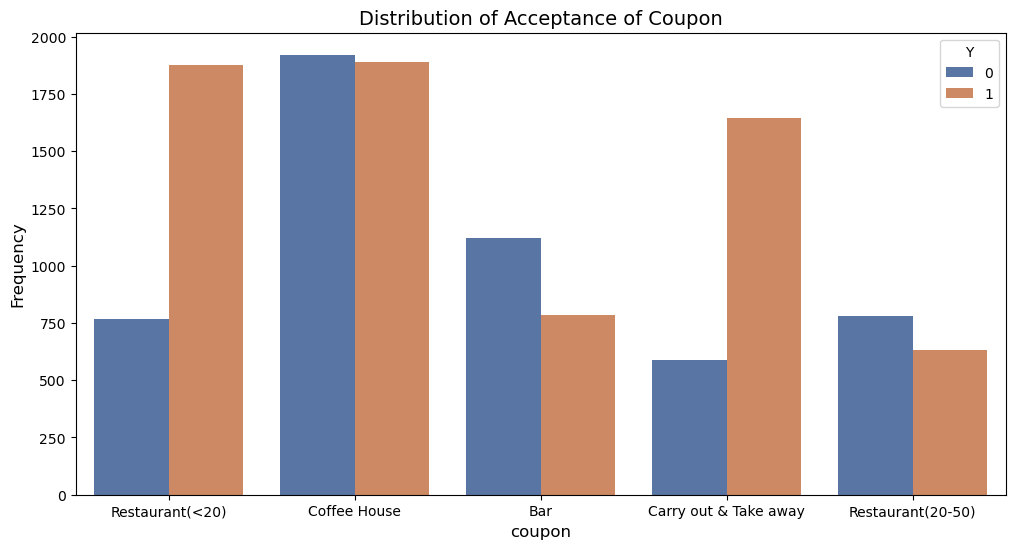

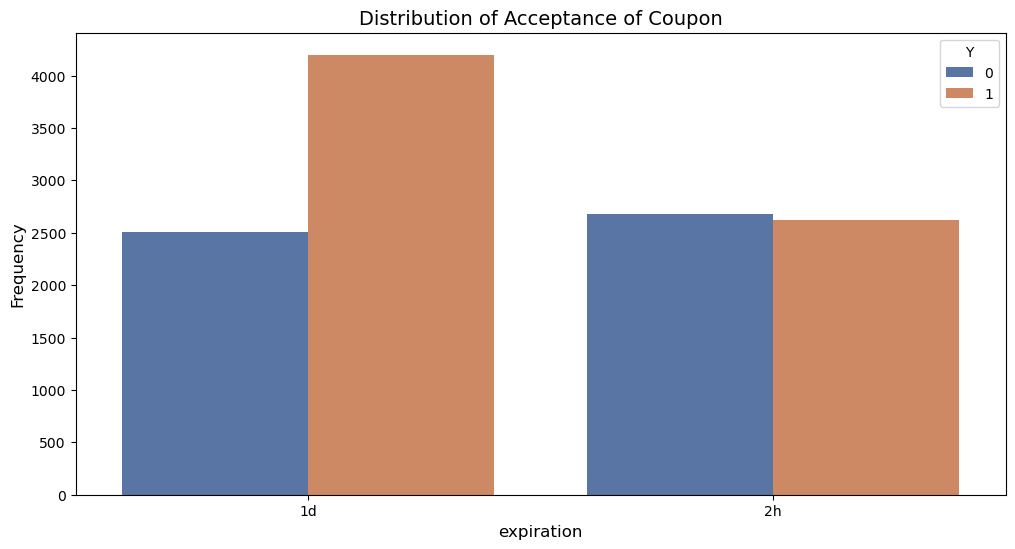

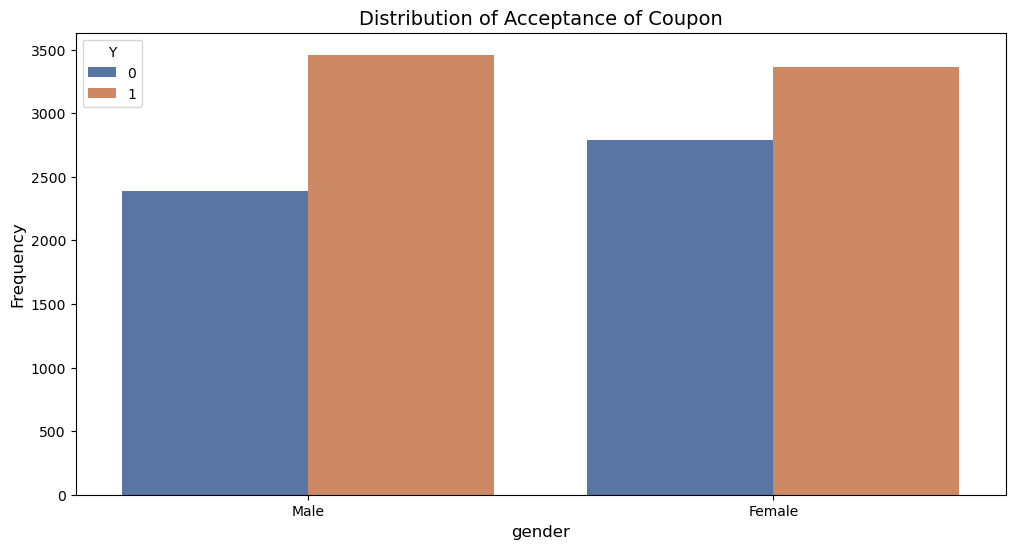

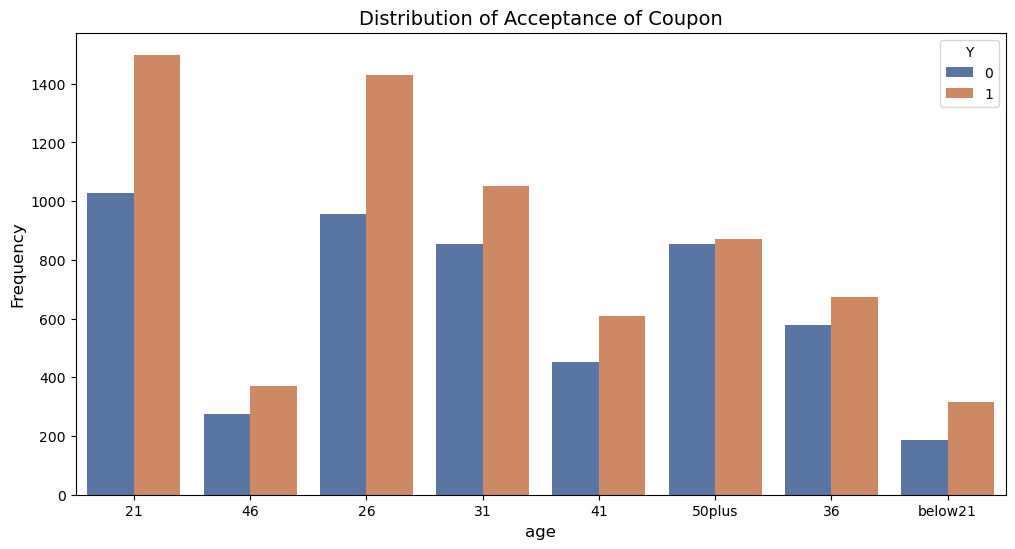

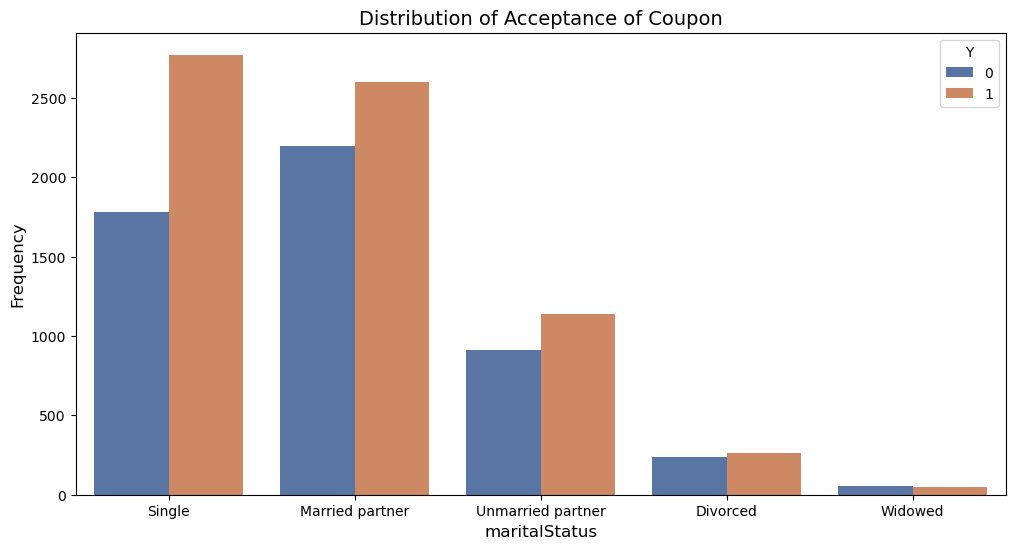

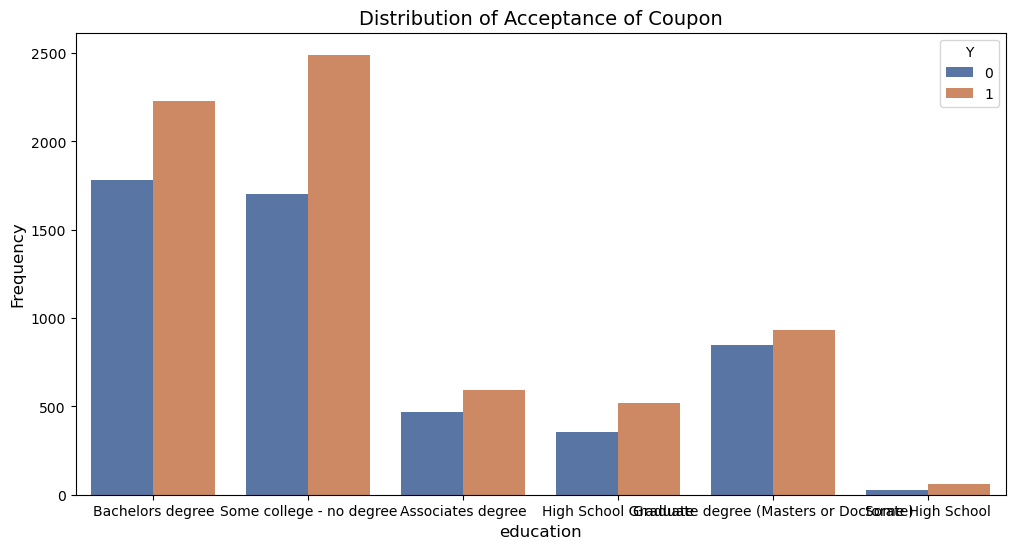

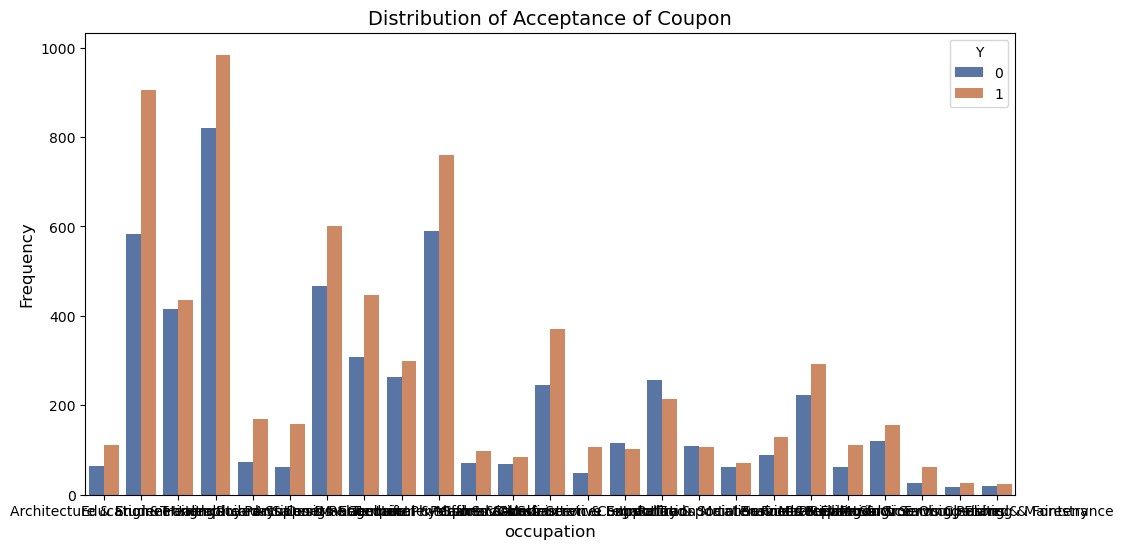

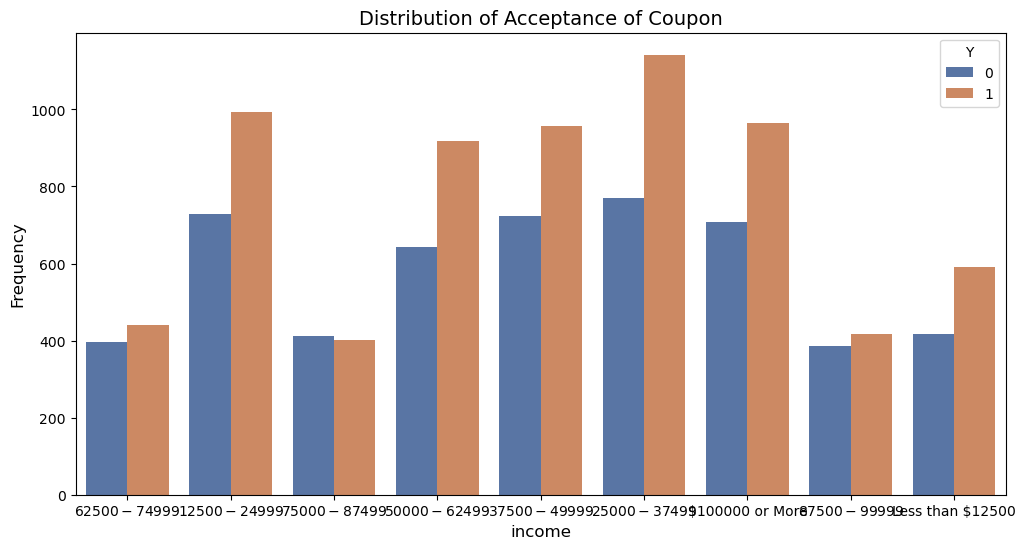

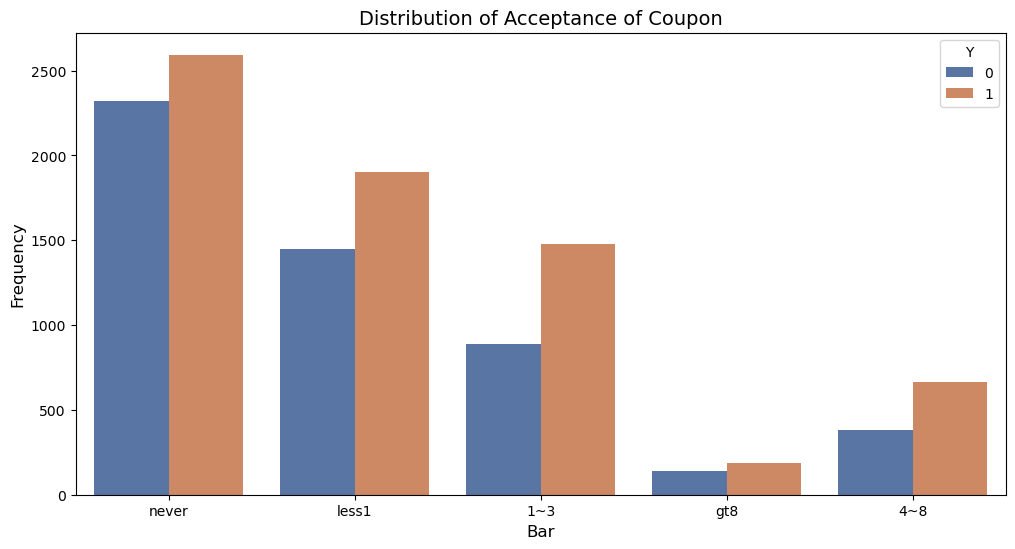

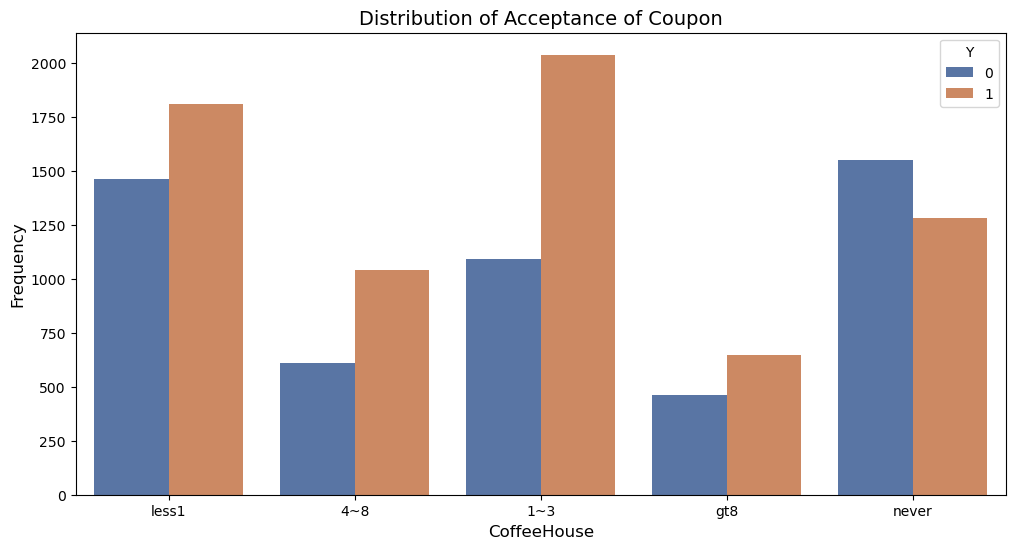

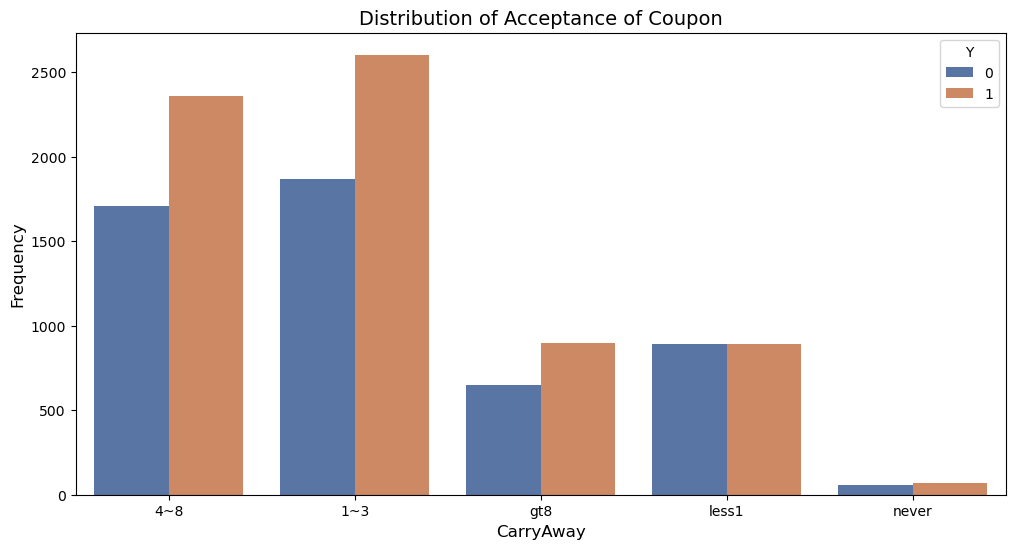

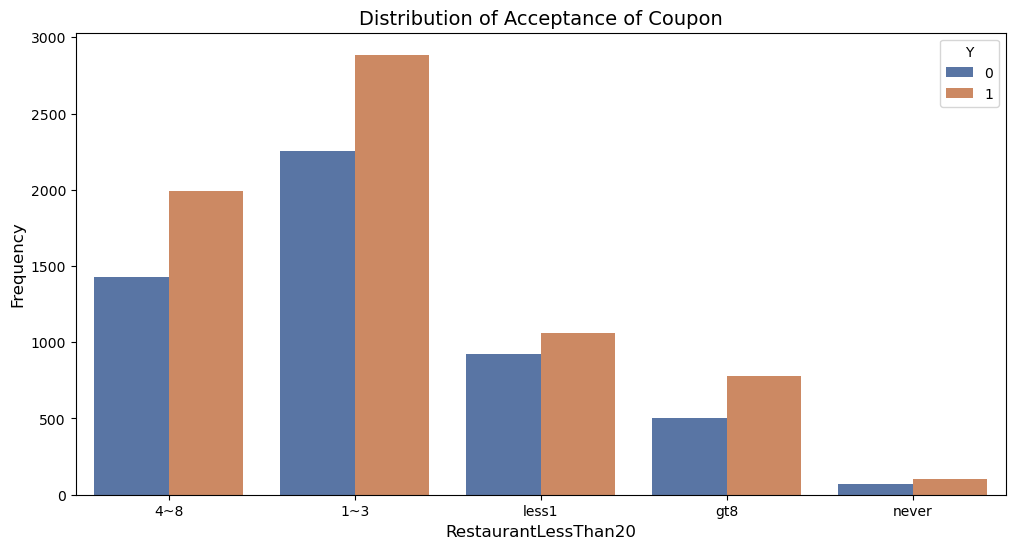

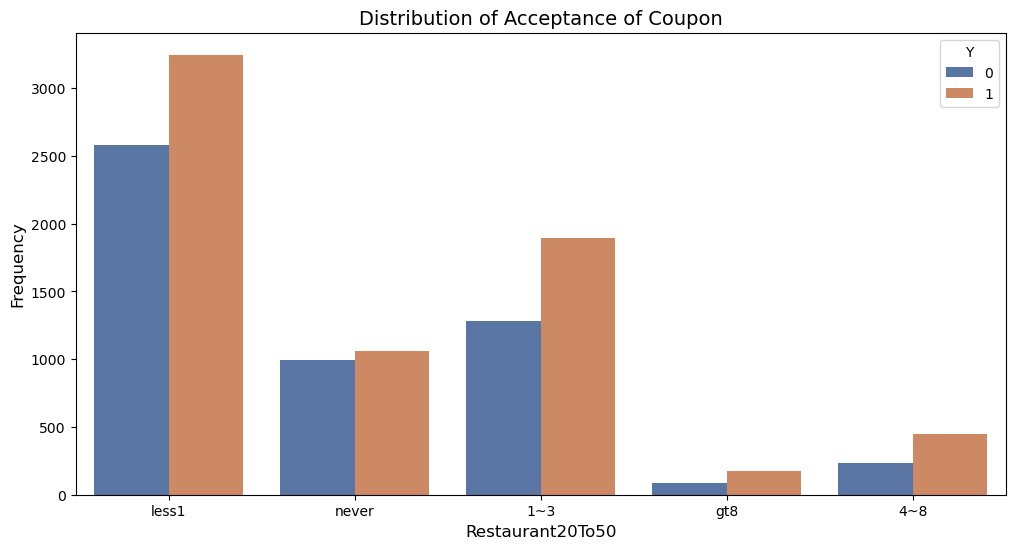

In [78]:
#Findings how category features relates to the Acceptance outcome (Y=0 vs. Y=1) - Seaborn CountPlot
#aqui
categorical_columns = coupons_df.select_dtypes(include=['object', 'category']).columns  # Adjust as necessary

n = 1
filename = ''

for col in categorical_columns:
    if col != 'Y':  # Assuming 'Y' as a categorical variable
        plt.figure(figsize=(12, 6))  #define figure size
        ax = sns.countplot(x=col, hue='Y', data=coupons_df, palette='deep') #columns are counted for the data given the hue of 'accept' and 'reject' coupons
        ax.set_title('Distribution of Acceptance of Coupon', fontsize=14)  ##format title
        ax.set_xlabel(col, fontsize=12)  #set x-axis title
        ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title
        filename = f"{n}_{col}_histogram.png"  #create the filename as a string - each histogram has its own figure on a separate file
        #plt.savefig(filename)  #save figure (NOTE: I am not saving these histograms as they were used for the initial analysis. I left it here for reference)
        #plt.savefig('../images/xxxxxx.png') #adjust folder when fisnihed using the GIT structure
        n = n + 1  #increase number to use in the filename for the next iteraction

In [79]:
#Count the total number of individuals who accepted/rejected a coupon and divide by the total number of individuals
print("Percentage of individuals who ACCEPTED the coupon:", coupons_df['Y'].value_counts()[1] / coupons_df['Y'].shape[0])
print("Percentage of individuals who DID NOT ACCEPT the coupon:", coupons_df['Y'].value_counts()[0] / coupons_df['Y'].shape[0])

Percentage of individuals who ACCEPTED the coupon: 0.5684184225868244
Percentage of individuals who DID NOT ACCEPT the coupon: 0.43158157741317565


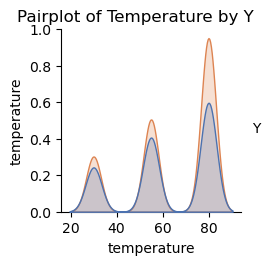

In [80]:
#Pairplot to verify if Temperature affect the Decision to Accept Offer (Y)
# Create the pairplot
g = sns.pairplot(coupons_df,
             x_vars=['temperature'],
             y_vars=['temperature'],
             hue='Y', palette='deep')

# Add a title to the figure
g.fig.suptitle("Pairplot of Temperature by Y", y=1.02)

# Save the figure to a file
#g.fig.savefig("pairplot_temperature_Y.png", dpi=300, bbox_inches='tight')
plt.savefig('../images/pairplot_temperature_Y.png', dpi=300, bbox_inches='tight')  #adjust folder when fisnihed using the GIT structure

# Show the plot
plt.show()

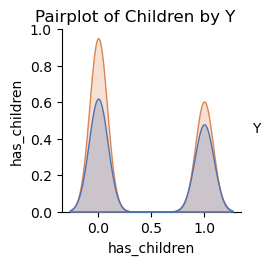

In [81]:
#Pairplot to verify if Children affect the Decision to Accept Offer (Y)
# Create the pairplot
g = sns.pairplot(coupons_df,
             x_vars=['has_children'],
             y_vars=['has_children'],
             hue='Y', palette='deep')

# Add a title to the figure
g.fig.suptitle("Pairplot of Children by Y", y=1.02)

# Save the figure to a file
#g.fig.savefig("pairplot_has_children_Y.png", dpi=300, bbox_inches='tight')
plt.savefig('../images/pairplot_has_children_Y.png', dpi=300, bbox_inches='tight')  #adjust folder when fisnihed using the GIT structure

# Show the plot
plt.show()

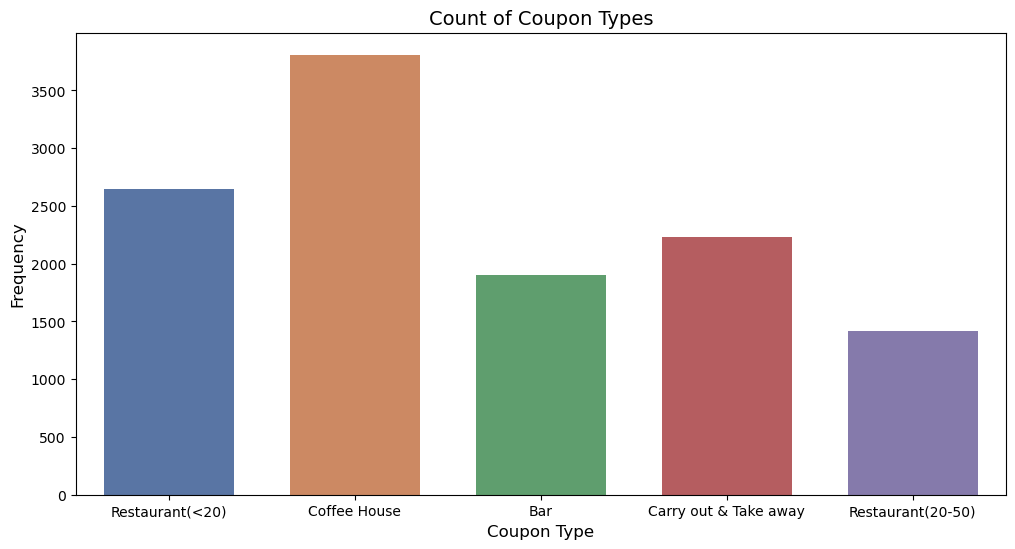

In [82]:
#Visualize the Count of Coupons per Type of Coupon - using Seaborn CountPlot
#Define figure size
plt.figure(figsize=(12,6))  

#Create plot
ax = sns.countplot(data = coupons_df, x=coupons_df['coupon'], width=0.7, palette='deep')

#Format title and labels
ax.set_title('Count of Coupon Types', fontsize=14)  #set plot title
ax.set_xlabel('Coupon Type', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('coupons_count.png')
plt.savefig('../images/coupons_count.png')  #adjust folder when fisnihed using the GIT structure

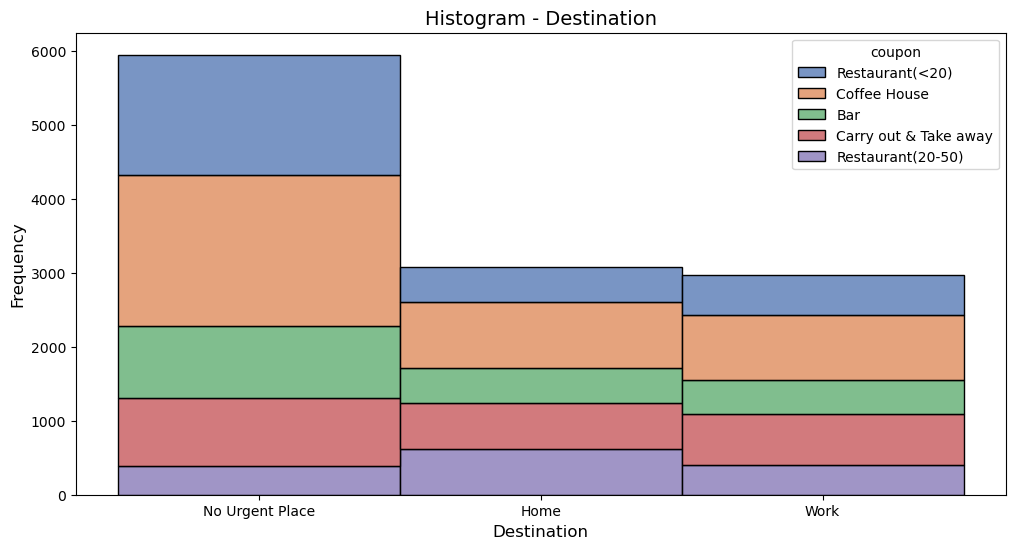

In [83]:
#Visualize the Histogram of Destination - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='destination', bins=4, binwidth=0.7, hue='coupon', 
                  multiple="stack", palette='deep',element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Destination', fontsize=14)  #set plot title
ax.set_xlabel('Destination', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('destination-histogram.png')
plt.savefig('../images/destination-histogram.png') #adjust folder when fisnihed using the GIT structure

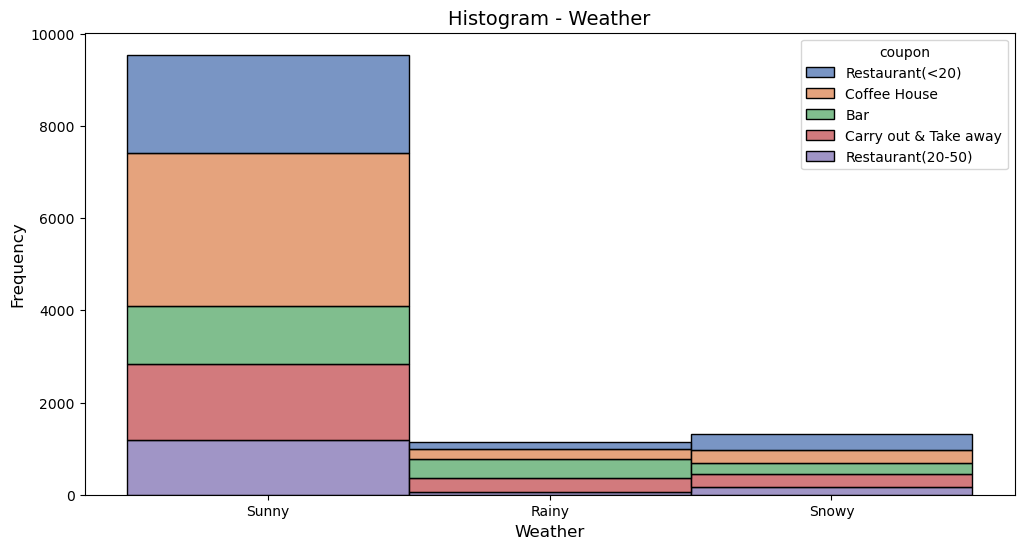

In [84]:
#Visualize the Histogram of Weather - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='weather', bins=4, binwidth=0.7, hue='coupon', 
                  multiple="stack", palette='deep',element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Weather', fontsize=14)  #set plot title
ax.set_xlabel('Weather', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('weather-histogram.png')
plt.savefig('../images/weather-histogram.png') #adjust folder when fisnihed using the GIT structure

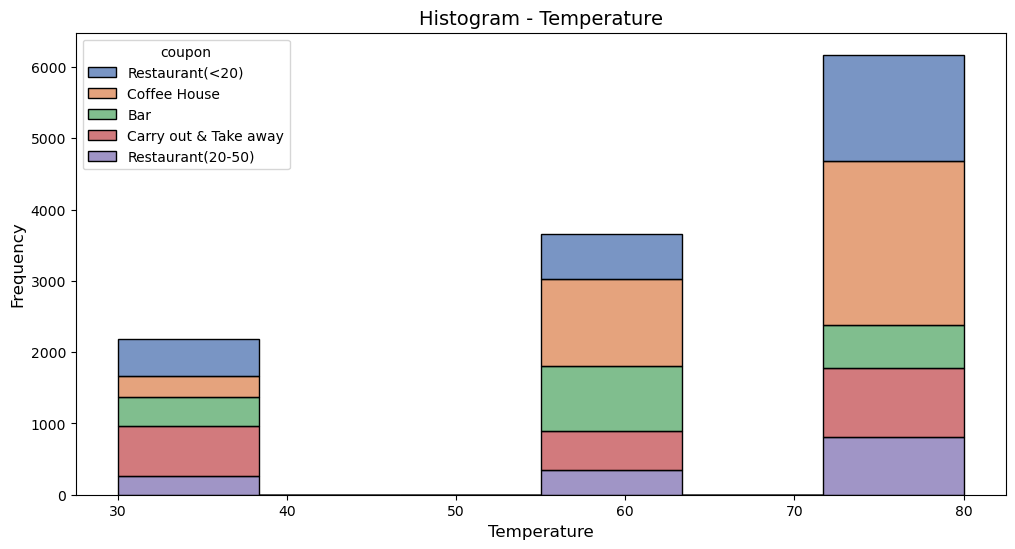

In [85]:
#Visualize the Histogram of Temperature - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='temperature', bins=4, binwidth=8, hue='coupon', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Temperature', fontsize=14)  #set plot title
ax.set_xlabel('Temperature', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('temperature-histogram.png')
plt.savefig('../images/temperature-histogram.png') #adjust folder when fisnihed using the GIT structure

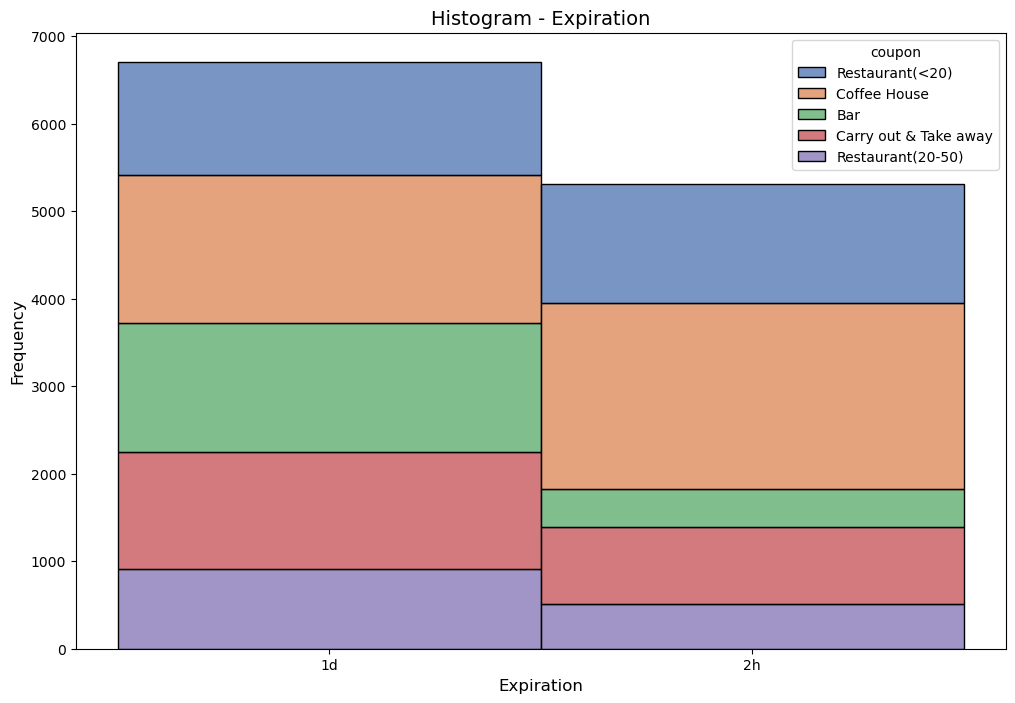

In [86]:
#Visualize the Histogram of Expiration - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,8))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='expiration', bins=2, binwidth=4, hue='coupon', 
                  multiple="stack", palette='deep',element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Expiration', fontsize=14)  #set plot title
ax.set_xlabel('Expiration', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('expiration-histogram.png')
plt.savefig('../images/expiration-histogram.png') #adjust folder when fisnihed using the GIT structure

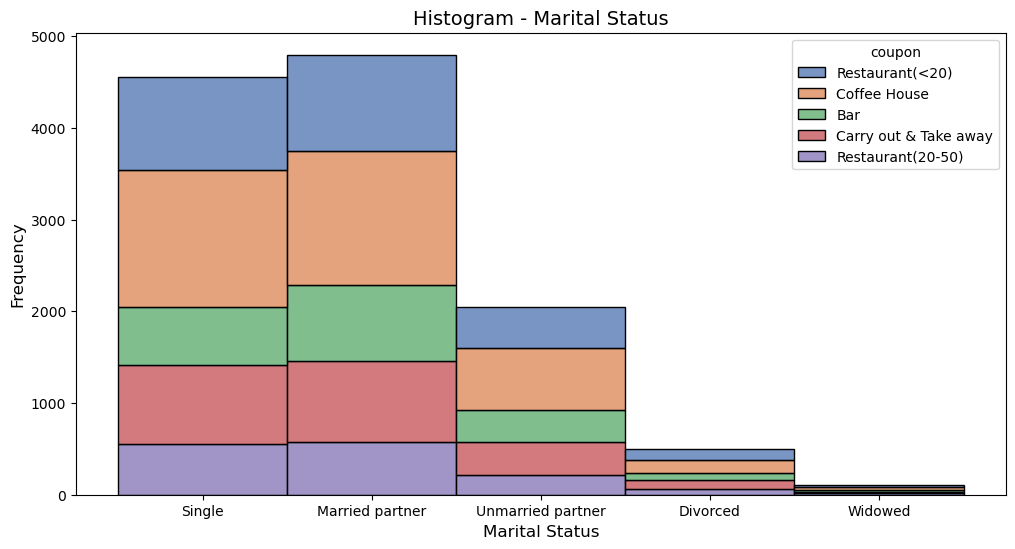

In [87]:
#Visualize the Histogram of Marital Status - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='maritalStatus', bins=4, binwidth=8, hue='coupon', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Marital Status', fontsize=14)  #set plot title
ax.set_xlabel('Marital Status', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('marital_status-histogram.png')
plt.savefig('../images/marital_status-histogram.png') #adjust folder when fisnihed using the GIT structure

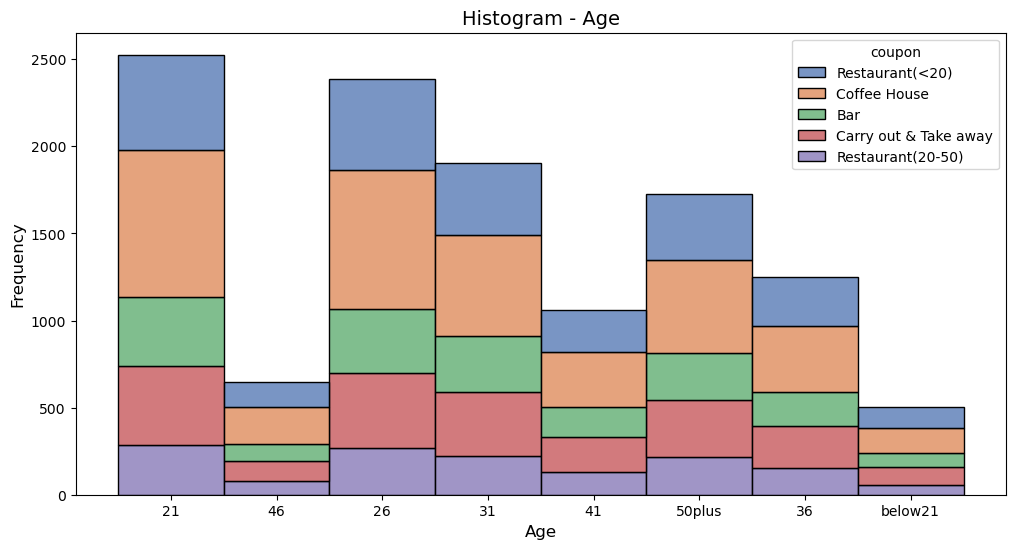

In [88]:
#Visualize the Histogram of Age  - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='age', bins=4, binwidth=8, hue='coupon', multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Age', fontsize=14)  #set plot title
ax.set_xlabel('Age', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('age-histogram.png')
plt.savefig('../images/age-histogram.png') #adjust folder when fisnihed using the GIT structure

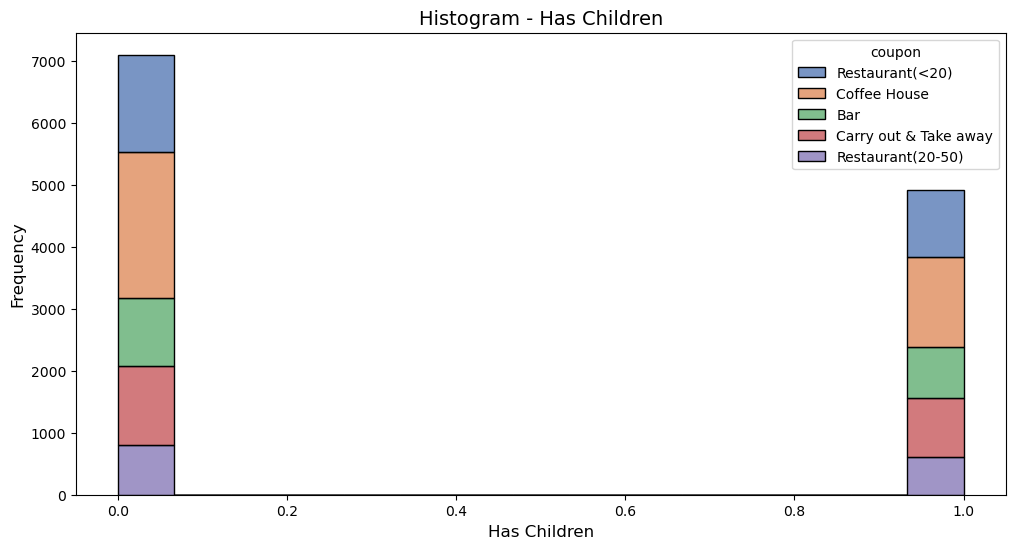

In [89]:
#Visualize the Histogram of variable 'has_children' (column was converted to integer before) - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn HistPlot
ax = sns.histplot(data = coupons_df, x='has_children', hue='coupon', multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Has Children', fontsize=14)  #set plot title
ax.set_xlabel('Has Children', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('has_children-histogram.png')
plt.savefig('../images/has_children-histogram.png') #adjust folder when fisnihed using the GIT structure

In [90]:
#Analysis
#Caclulate the acceptance as a total of offers per type of coupon

coupon_types = {
    'Restaurant(<20)', 
    'Coffee House', 
    'Bar', 
    'Carry out & Take away',
    'Restaurant(20-50)'
    }

for col in coupon_types:
    df_sub_coupon = coupons_df.query("coupon in @col")  #create a subset dataframe
    print("Customer who accepted a",col, "coupon =", 
          df_sub_coupon.query("Y == 1").shape[0] / df_sub_coupon.shape[0],)  #calculate percentage

Customer who accepted a Restaurant(<20) coupon = 0.7097505668934241
Customer who accepted a Restaurant(20-50) coupon = 0.4465675866949752
Customer who accepted a Carry out & Take away coupon = 0.7357814599193909
Customer who accepted a Coffee House coupon = 0.495668154371226
Customer who accepted a Bar coupon = 0.4118572927597062


In [91]:
#Analyse the Carry out & Take away coupons
#Note: these coupons received the higher acceptance rates.

In [92]:
#Create a dataframe containing only Carry out & Take away coupons
df_carryaway_coupon = coupons_df.query("coupon == 'Carry out & Take away'")

In [93]:
#Inspect first lines of the filtered dataset
df_carryaway_coupon

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
33,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,1
41,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
47,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
55,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


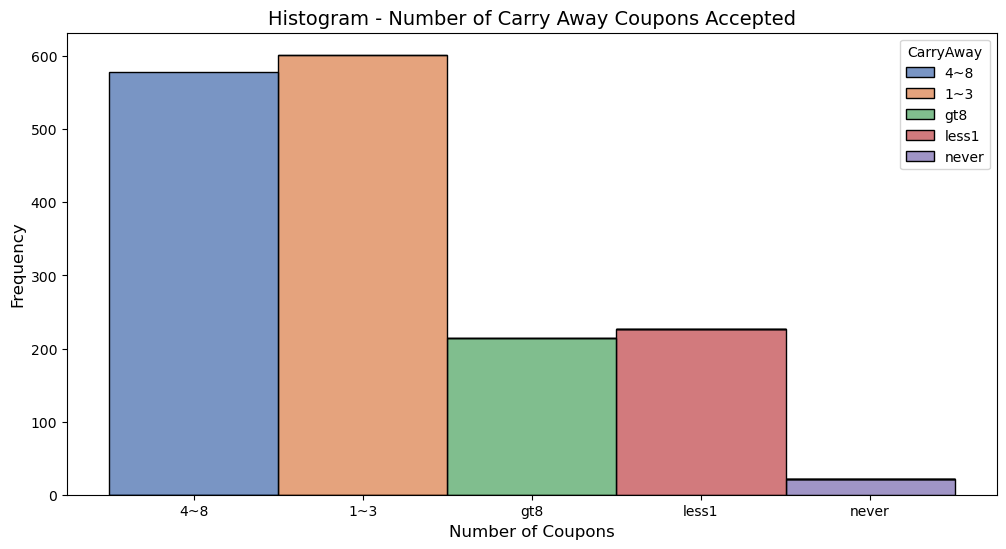

In [94]:
#Visualize the Histogram of Number of Coupons Accepted - using Seaborn HistPlot

#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_accepted = coupons_df.query("Y == 1 and coupon == 'Carry out & Take away'")
ax = sns.histplot(data = df_carryaway_accepted, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Accepted', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('carry_away_accepted-histogram.png')
plt.savefig('../images/carry_away_accepted-histogram.png') #adjust folder when fisnihed using the GIT structure

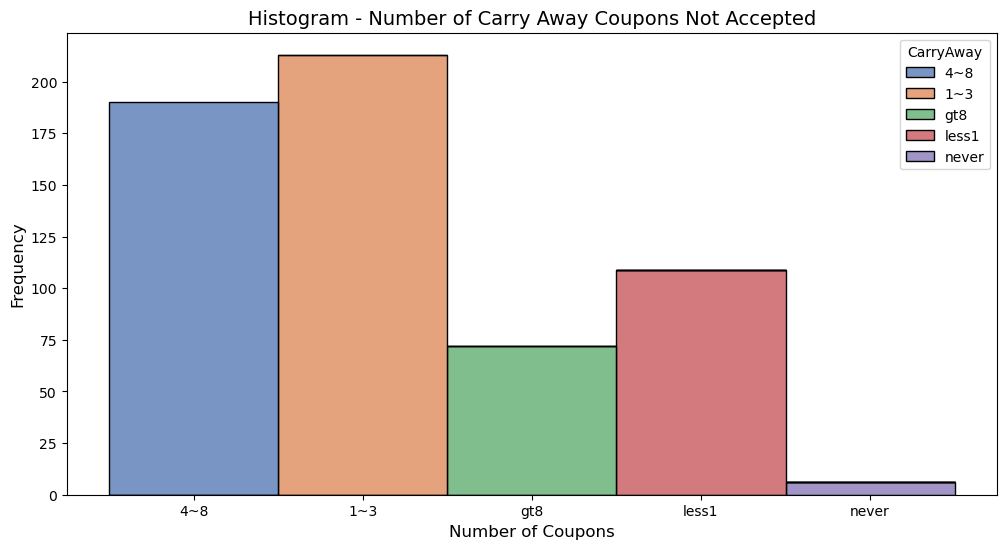

In [95]:
#Visualize the Histogram of Number of Coupons NOT Accepted - using Seaborn HistPlot

#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_rejected = coupons_df.query("Y == 0 and coupon == 'Carry out & Take away'")
ax = sns.histplot(data = df_carryaway_rejected, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Not Accepted', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('carry_away_not_accepted-histogram.png')
plt.savefig('../images/carry_away_not_accepted-histogram.png') #adjust folder when fisnihed using the GIT structure

In [96]:
#Question 1: Are Carry out & Take away coupons ACCEPTED by older people who are alone?

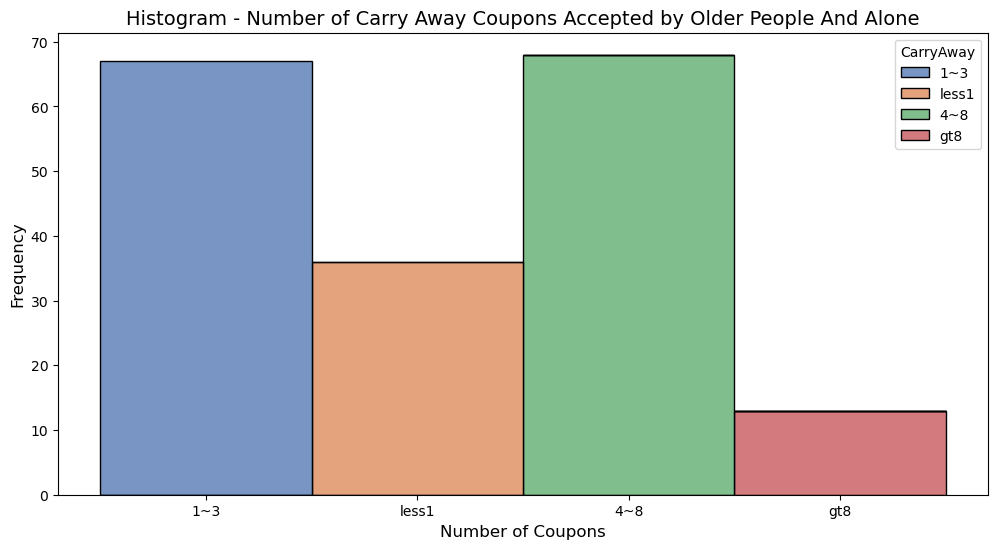

In [97]:
#Question 1a: Are Carry out & Take away coupons ACCEPTED by older people who are alone?

#People who: 1) accepted a Carry out & Take away; 2) are Single or Divorced or Widowed; 3) are older - '41' or '46' or '50plus'.

#Notes:
# - In this analysis I did not consider the 'kids' factor: people with kids may use more carry away coupons, regardless of age and marital status.
# - This hipothesys will be tested later.

#Filters for selection
maritalstatus_types = ['Single', 'Divorced', 'Widowed']
age_types = ['41', '46', '50plus']

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_older_alone = coupons_df.query("Y == 1 and coupon == 'Carry out & Take away' and maritalStatus in @maritalstatus_types and age in @age_types")
ax = sns.histplot(data = df_carryaway_older_alone, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Accepted by Older People And Alone', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('1a-carry_away_accepted_old_alone-histogram.png')
plt.savefig('../images/1a-carry_away_accepted_old_alone-histogram.png') #adjust folder when fisnihed using the GIT structure

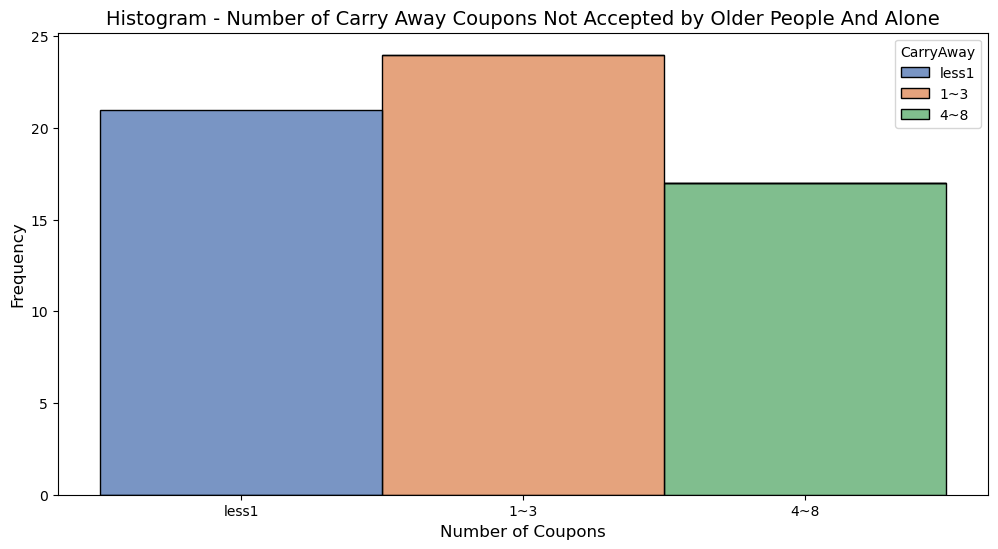

In [98]:
#Question 1b: Are Carry out & Take away coupons NOT ACCEPTED by older people who are alone?

# People who: 1) rejected a Carry out & Take away; 2) are Single or Divorced or Widowed; 3) are older - '41' or '46' or '50plus'.

#Notes:
# - In this analysis I did not consider the 'kids' factor: people with kids may use more carry away coupons, regardless of age and marital status.
# - This hipothesys will be tested later.

#Filters for selection
maritalstatus_types = ['Single', 'Divorced', 'Widowed']
age_types = ['41', '46', '50plus']

#Visualize the Histogram - using Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_older_alone = coupons_df.query("Y == 0 and coupon == 'Carry out & Take away' and maritalStatus in @maritalstatus_types and age in @age_types")
ax = sns.histplot(data = df_carryaway_older_alone, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Not Accepted by Older People And Alone', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('1b-carry_away_rejected_old_alone-histogram.png')
plt.savefig('../images/1b-carry_away_rejected_old_alone-histogram.png') #adjust folder when fisnihed using the GIT structure

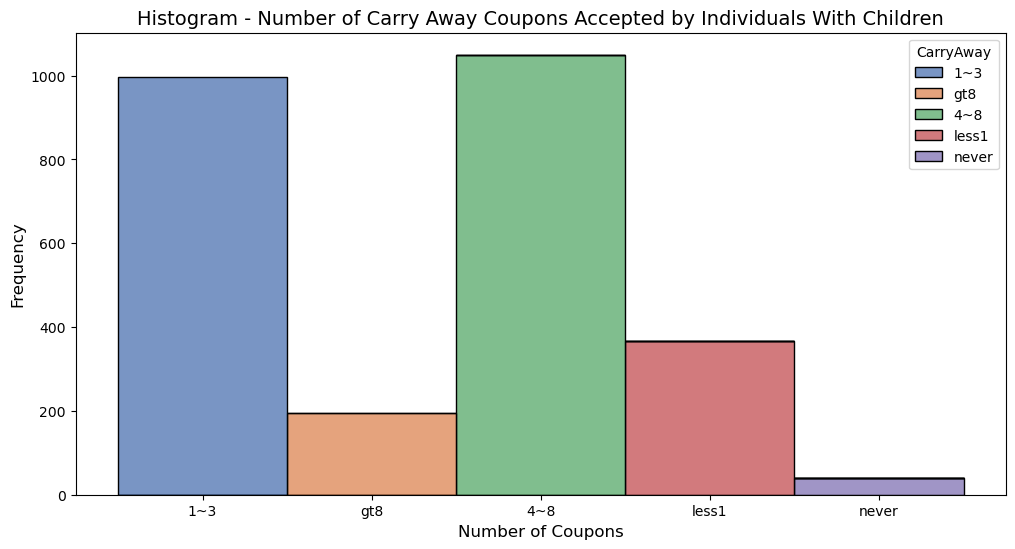

In [99]:
#Question 2: The "kids factor" - do people use more carry away coupons when they have children, regardless of age and marital status?
#Question 2a: The "kids factor" - do people use more carry away coupons when they have children, regardless of age and marital status?
#People who: 1) accepted a carry away; and 2) have children

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 1 and has_children == 1")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Accepted by Individuals With Children', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('2a-carry_away_accepted_children-histogram.png')
plt.savefig('../images/2a-carry_away_accepted_children-histogram.png') #adjust folder when fisnihed using the GIT structure

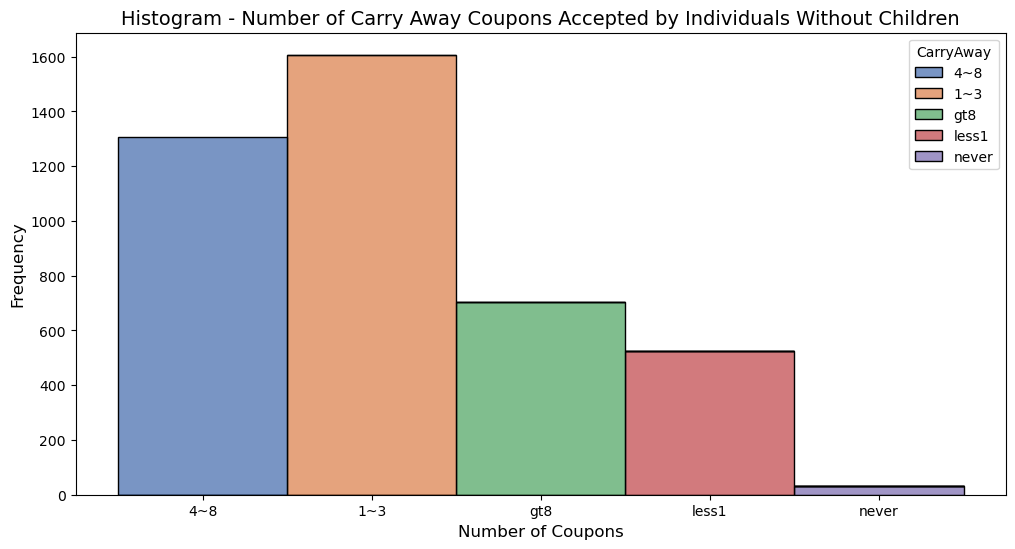

In [100]:
#Question 2b: The "kids factor" - do people use more carry away coupons when they have children, regardless of age and marital status?
#People who: 1) accepted a carry away; and 2) DO NOT have children

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 1 and has_children == 0")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Accepted by Individuals Without Children', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('2b-carry_away_accepted_no_children-histogram.png')
plt.savefig('../images/2b-carry_away_accepted_no_children-histogram.png') #adjust folder when fisnihed using the GIT structure

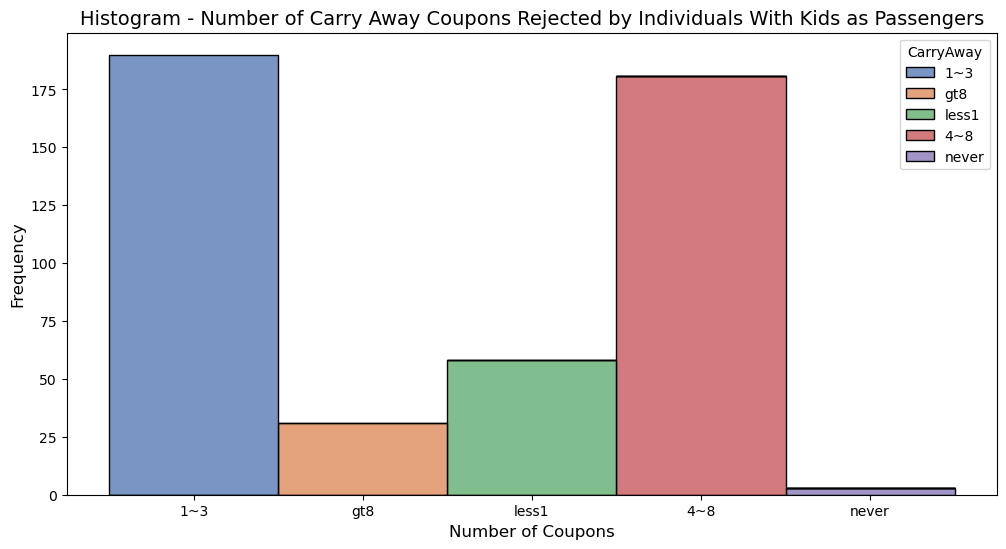

In [101]:
#Question 3: Are there other types of individuals who rejected the Carry out & Take away coupons?

#Question 3a: What is the individual's behavior when Kids are Passengers, theirs or not?
#People who: 1) accepted a carry away; and 2) have kids as passengers, their kids or not

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 1 and passenger == 'Kid(s)'")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Rejected by Individuals With Kids as Passengers', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('3a-carry_away_accepted_kids_passengers-histogram.png')
plt.savefig('../images/3a-carry_away_accepted_kids_passengers-histogram.png') #adjust folder when fisnihed using the GIT structure

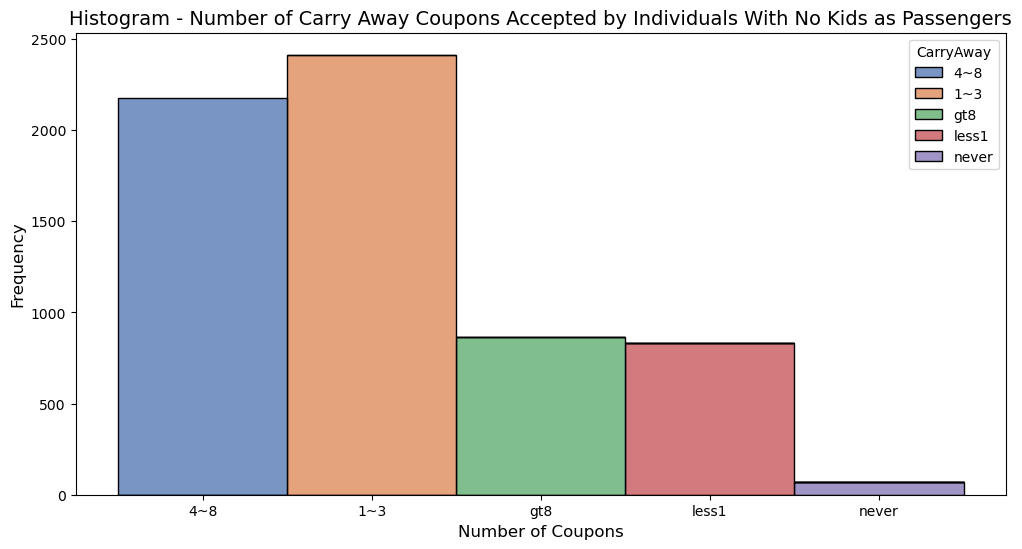

In [102]:
#Question 3b: What is the individual's behavior when there are no kids as Passengers?
#People who: 1) accepted a carry away; and 2) do not have kids as passengers

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 1 and passenger != 'Kid(s)'")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Accepted by Individuals With No Kids as Passengers', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('3b-carry_away_accepted_no_kids_passengers-histogram.png')
plt.savefig('../images/3b-carry_away_accepted_no_kids_passengers-histogram.png') #adjust folder when fisnihed using the GIT structure

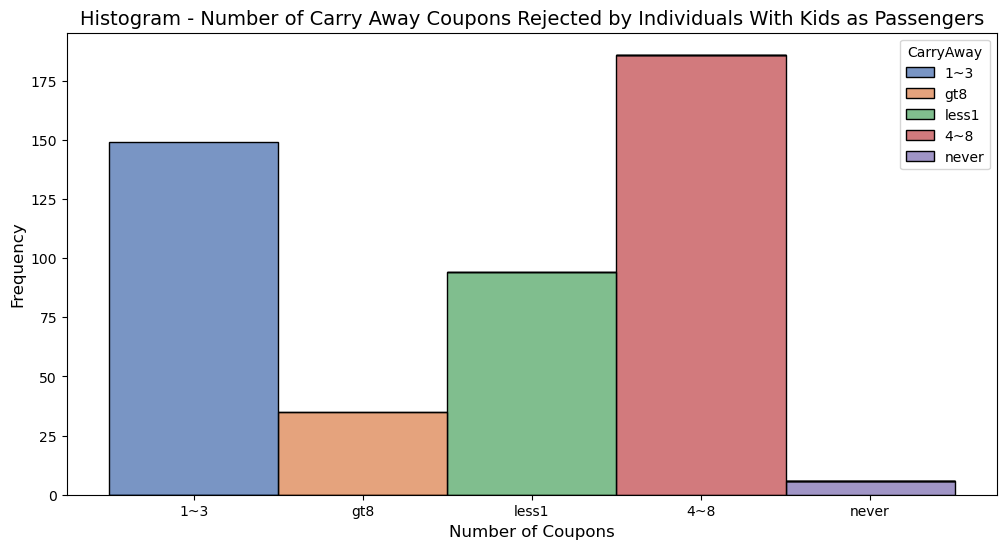

In [103]:
#Question 3: Are there other types of individuals who rejected the Carry out & Take away coupons?

#Question 3c: What is the individual's behavior when there are Passengers who are Kids, theirs or not?
#People who: 1) rejected a carry away; and 2) have kids as passengers, their kids or not

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 0 and passenger == 'Kid(s)'")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Rejected by Individuals With Kids as Passengers', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('3c-carry_away_rejected_kids_passengers-histogram.png')
plt.savefig('../images/3c-carry_away_rejected_kids_passengers-histogram.png') #adjust folder when fisnihed using the GIT structure

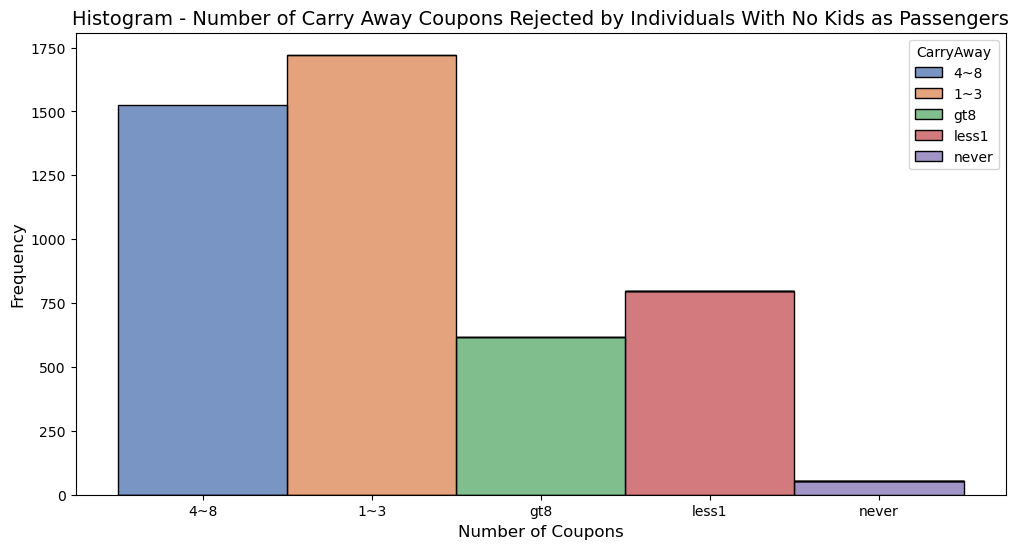

In [104]:
#Question 3: Are there other types of individuals who rejected the Carry out & Take away coupons?

#Question 3d: What is the individual's behavior when there are Passengers who are Kids, theirs or not?
#People who: 1) rejected a carry away; and 2) do not have kids as passengers, theirs or not

#Visualize the Histogram - Seaborn HistPlot
#Define figure size
plt.figure(figsize=(12,6))  #define figure size

#Create an histogram - Seaborn Histplot
df_carryaway_kids = coupons_df.query("Y == 0 and passenger != 'Kid(s)'")
ax = sns.histplot(data = df_carryaway_kids, x='CarryAway', bins=4, binwidth=8, hue='CarryAway', 
                  multiple="stack", palette='deep', element='bars', kde=False)

#Format title and labels
ax.set_title('Histogram - Number of Carry Away Coupons Rejected by Individuals With No Kids as Passengers', fontsize=14)  #set plot title
ax.set_xlabel('Number of Coupons', fontsize=12)  #set x-axis title
ax.set_ylabel('Frequency', fontsize=12)  #set y-axis title

#Save figure
#plt.savefig('3d-carry_away_rejected_no_kids_passengers-histogram.png')
plt.savefig('../images/3d-carry_away_rejected_no_kids_passengers-histogram.png') #adjust folder when fisnihed using the GIT structure